<a href="https://colab.research.google.com/github/agarwalarpit99/DataAnalysisProjects/blob/master/Flight_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df_train=pd.read_excel('Data_Train.xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df_test=pd.read_excel('Test_set.xlsx')

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [8]:
#or we can use df=df_train.append(df_test)
df=pd.concat([df_train,df_test],axis=0) # concat for joining vertically and horizontally by defining axis paramenter and merge for joining horizontal on a specific field.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [10]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [11]:
#Feature Engineering
df['Date_of_Journey'].apply(lambda x : x.split('/')[0])

0       24
1        1
2        9
3       12
4       01
        ..
2666     6
2667    27
2668     6
2669     6
2670    15
Name: Date_of_Journey, Length: 13354, dtype: object

In [12]:
#Feature Engineering
df['Date']=df['Date_of_Journey'].apply(lambda x : x.split('/')[0])
df['Month']=df['Date_of_Journey'].apply(lambda x : x.split('/')[1])
df['Year']=df['Date_of_Journey'].apply(lambda x : x.split('/')[2])

In [13]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [14]:
#changing Data type of it
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int64  
 12  Month            13354 non-null  int64  
 13  Year             13354 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 2.0+ MB


In [15]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x : x.split(' ')[0])

In [16]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [17]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [18]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [22]:
df['Arrival_hour']=df['Arrival_Time'].apply(lambda x : x.split(':')[0])
df['Arrival_min']=df['Arrival_Time'].apply(lambda x : x.split(':')[1])

In [23]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [24]:
df['Arrival_hour']=df['Arrival_hour'].astype(int)
df['Arrival_min']=df['Arrival_min'].astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int64  
 11  Month            13354 non-null  int64  
 12  Year             13354 non-null  int64  
 13  Arrival_hour     13354 non-null  int64  
 14  Arrival_min      13354 non-null  int64  
dtypes: float64(1), int64(5), object(9)
memory usage: 1.6+ MB


In [26]:
df.drop('Arrival_Time',inplace=True,axis=1)

In [27]:
#Departure time
df['Dep_hour']=df['Dep_Time'].apply(lambda x : x.split(':')[0])
df['Dep_min']=df['Dep_Time'].apply(lambda x : x.split(':')[1])

In [28]:
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20


In [29]:
df['Dep_hour']=df['Dep_hour'].astype(int)
df['Dep_min']=df['Dep_min'].astype(int)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Duration         13354 non-null  object 
 6   Total_Stops      13353 non-null  object 
 7   Additional_Info  13354 non-null  object 
 8   Price            10683 non-null  float64
 9   Date             13354 non-null  int64  
 10  Month            13354 non-null  int64  
 11  Year             13354 non-null  int64  
 12  Arrival_hour     13354 non-null  int64  
 13  Arrival_min      13354 non-null  int64  
 14  Dep_hour         13354 non-null  int64  
 15  Dep_min          13354 non-null  int64  
dtypes: float64(1), int64(7), object(8)
memory usage: 1.7+ MB


In [31]:
df.drop('Dep_Time',inplace=True,axis=1)

In [32]:
df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20


In [33]:
df['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [34]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [36]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [37]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

In [39]:
df.drop('Route',axis=1,inplace=True)

In [40]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50


In [45]:
df['Duration_hr']=df['Duration'].apply(lambda x : x.split(' ')[0]).apply(lambda x : x.split('h')[0])

In [46]:
df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,19


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Duration         13354 non-null  object 
 4   Total_Stops      13353 non-null  float64
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
 7   Date             13354 non-null  int64  
 8   Month            13354 non-null  int64  
 9   Year             13354 non-null  int64  
 10  Arrival_hour     13354 non-null  int64  
 11  Arrival_min      13354 non-null  int64  
 12  Dep_hour         13354 non-null  int64  
 13  Dep_min          13354 non-null  int64  
 14  Duration_hr      13354 non-null  object 
dtypes: float64(2), int64(7), object(6)
memory usage: 1.6+ MB


In [48]:
df['Duration_hr'].astype(int)

ValueError: ignored

In [49]:
df['Duration_hr'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [54]:
df[df['Duration_hr']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50,5m
2660,Air India,Mumbai,Hyderabad,5m,2.0,No info,NaN,12,3,2019,16,55,16,50,5m


In [55]:
df.drop([6474,2660],axis=0,inplace=True)

In [75]:
df['Duration_hr']=df['Duration_hr'].astype(int)

In [72]:
#df['Duration_min']=df['Duration'].apply(lambda x : x.split(' ')[-1]).apply(lambda x : x.split('m')[0])

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  object 
 1   Source           13351 non-null  object 
 2   Destination      13351 non-null  object 
 3   Duration         13351 non-null  object 
 4   Total_Stops      13350 non-null  float64
 5   Additional_Info  13351 non-null  object 
 6   Price            10681 non-null  float64
 7   Date             13351 non-null  int64  
 8   Month            13351 non-null  int64  
 9   Year             13351 non-null  int64  
 10  Arrival_hour     13351 non-null  int64  
 11  Arrival_min      13351 non-null  int64  
 12  Dep_hour         13351 non-null  int64  
 13  Dep_min          13351 non-null  int64  
 14  Duration_hr      13351 non-null  int64  
 15  Duration_min     13351 non-null  object 
dtypes: float64(2), int64(8), object(6)
memory usage: 2.2+ MB


In [79]:
df.drop(['Duration','Duration_min'],axis=1,inplace=True)

In [81]:
df.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,1,5,2019,13,15,5,50,7
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,9,6,2019,4,25,9,25,19


In [82]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [83]:
df['Airline']=label.fit_transform(df['Airline'])

In [84]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr
0,3,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,22,20,2
1,1,Kolkata,Banglore,2.0,No info,7662.0,1,5,2019,13,15,5,50,7
2,4,Delhi,Cochin,2.0,No info,13882.0,9,6,2019,4,25,9,25,19
3,3,Kolkata,Banglore,1.0,No info,6218.0,12,5,2019,23,30,18,5,5
4,3,Banglore,New Delhi,1.0,No info,13302.0,1,3,2019,21,35,16,50,4


In [85]:
df['Source']=label.fit_transform(df['Source'])
df['Destination']=label.fit_transform(df['Destination'])
df['Additional_Info']=label.fit_transform(df['Additional_Info'])

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13351 non-null  int64  
 1   Source           13351 non-null  int64  
 2   Destination      13351 non-null  int64  
 3   Total_Stops      13350 non-null  float64
 4   Additional_Info  13351 non-null  int64  
 5   Price            10681 non-null  float64
 6   Date             13351 non-null  int64  
 7   Month            13351 non-null  int64  
 8   Year             13351 non-null  int64  
 9   Arrival_hour     13351 non-null  int64  
 10  Arrival_min      13351 non-null  int64  
 11  Dep_hour         13351 non-null  int64  
 12  Dep_min          13351 non-null  int64  
 13  Duration_hr      13351 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 2.0 MB


In [87]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,2
1,1,3,0,2.0,8,7662.0,1,5,2019,13,15,5,50,7
2,4,2,1,2.0,8,13882.0,9,6,2019,4,25,9,25,19
3,3,3,0,1.0,8,6218.0,12,5,2019,23,30,18,5,5
4,3,0,5,1.0,8,13302.0,1,3,2019,21,35,16,50,4


In [88]:
'''
There are two ways for handling categorical variable 
1.Label Encoding
2.One-hot encoding

Label Encoding: In this we are rank the data based on alphabetical order.
Onehot Encoding: In this there is 0 or 1 value'''

'\nThere are two ways for handling categorical variable \n1.Label Encoding\n2.One-hot encoding\n\nLabel Encoding: In this we are rank the data based on alphabetical order.\nOnehot Encoding: In this there is 0 or 1 value'

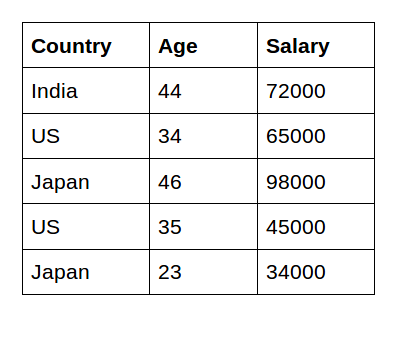

In [89]:
#By Label coding:



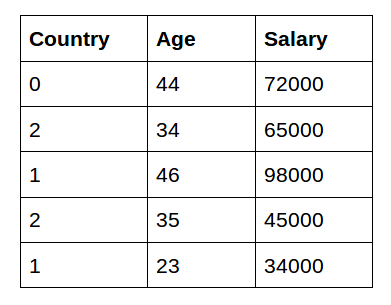

As you can see here, label encoding uses alphabetical ordering. Hence, India has been encoded with 0, the US with 2, and Japan with 1.

 

Challenges with Label Encoding
In the above scenario, the Country names do not have an order or rank. But, when label encoding is performed, the country names are ranked based on the alphabets. Due to this, there is a very high probability that the model captures the relationship between countries such as India < Japan < the US.

This is something that we do not want! So how can we overcome this obstacle? Here comes the concept of One-Hot Encoding.

One-Hot Encoding
One-Hot Encoding is another popular technique for treating categorical variables. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.

One-Hot Encoding is the process of creating dummy variables.

In this encoding technique, each category is represented as a one-hot vector. Let’s see how to implement one-hot encoding in Python:

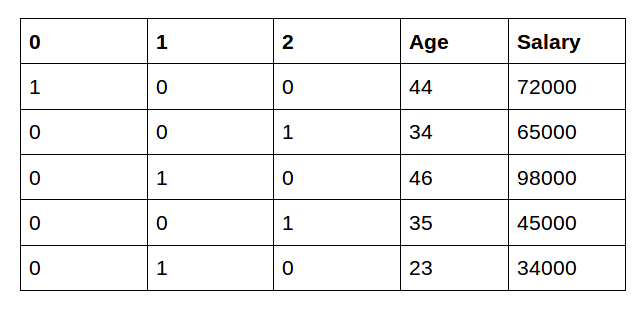

Challenges of One-Hot Encoding: Dummy Variable Trap
One-Hot Encoding results in a Dummy Variable Trap as the outcome of one variable can easily be predicted with the help of the remaining variables.

Dummy Variable Trap is a scenario in which variables are highly correlated to each other.

The Dummy Variable Trap leads to the problem known as multicollinearity. Multicollinearity occurs where there is a dependency between the independent features. Multicollinearity is a serious issue in machine learning models like Linear Regression and Logistic Regression.

So, in order to overcome the problem of multicollinearity, one of the dummy variables has to be dropped. Here, I will practically demonstrate how the problem of multicollinearity is introduced after carrying out the one-hot encoding.

One of the common ways to check for multicollinearity is the Variance Inflation Factor (VIF):

VIF=1, Very Less Multicollinearity
VIF<5, Moderate Multicollinearity
VIF>5, Extreme Multicollinearity (This is what we have to avoid)

When to use a Label Encoding vs. One Hot Encoding
This question generally depends on your dataset and the model which you wish to apply. But still, a few points to note before choosing the right encoding technique for your model:

We apply One-Hot Encoding when:

The categorical feature is not ordinal (like the countries above)
The number of categorical features is less so one-hot encoding can be effectively applied


We apply Label Encoding when:

The categorical feature is ordinal (like Jr. kg, Sr. kg, Primary school, high school)
 The number of categories is quite large as one-hot encoding can lead to high memory consumption